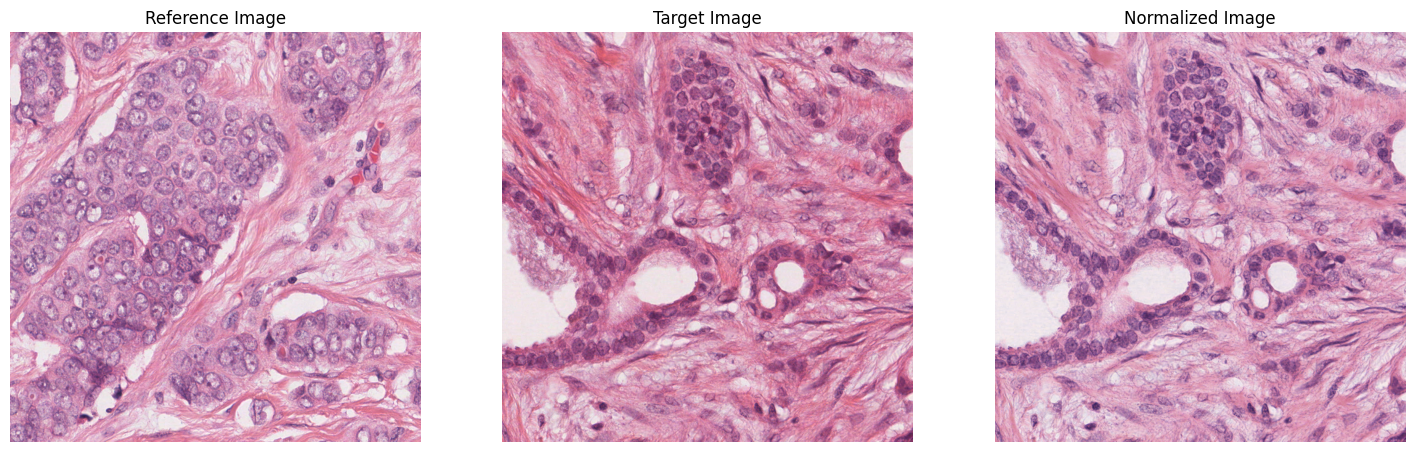

time taken is:


0.05683088302612305

In [4]:
import cv2
import numpy as np
from skimage import io
from skimage.color import rgb2hed, hed2rgb
import matplotlib.pyplot as plt
import time

reference_image = io.imread('example1.png')
target_image = io.imread('example2.png')

ref_hed = rgb2hed(reference_image)
target_hed = rgb2hed(target_image)

def normalize_stain(target_hed, ref_hed):
    normalized_target = target_hed.copy()
    for i in range(3): 
        ref_mean = np.mean(ref_hed[:, :, i])
        target_mean = np.mean(target_hed[:, :, i])
        normalized_target[:, :, i] = target_hed[:, :, i] * (ref_mean / target_mean)
    return normalized_target

start_time = time.time()

normalized_hed = normalize_stain(target_hed, ref_hed)

normalized_image = hed2rgb(normalized_hed)

end_time = time.time()
time_taken = end_time - start_time

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(reference_image)
axes[0].set_title('Reference Image')
axes[0].axis('off')

axes[1].imshow(target_image)
axes[1].set_title('Target Image')
axes[1].axis('off')

axes[2].imshow(normalized_image)
axes[2].set_title('Normalized Image')
axes[2].axis('off')

plt.show()
print("time taken is:")
time_taken
